# Data Handling

In [1]:
# Importing all the libraries required throughout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Creating a pandas dataframe "df"
df = pd.read_csv("loan.csv")

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
# Dry running code for missing value percentages columnwise
((df.isnull().sum()/len(df))*100).value_counts()

100.000000    54
0.000000      43
0.140998       2
6.191303       1
2.706650       1
32.580507      1
0.027696       1
64.662487      1
92.985372      1
0.125891       1
0.178765       1
97.129693      1
0.005036       1
1.754916       1
0.098195       1
dtype: int64

In [7]:
# Creating a function for dropping columns greater than 35% of missing values
def clearNAcols(data,percentage=0.35):   
    df1 = data.copy()
    shapedas = df1.shape
    cols = df1.isnull().sum()/len(df1)
    cols = list(cols[cols.values>=percentage].index)
    df1.drop(labels=cols, axis=1, inplace=True)
    print("Number of columns dropped: ",len(cols))
    print("Old dataset shape: ",shapedas)
    print("New dataset shape: ",df1.shape)
    return df1



In [8]:
# Applying function to dataframe
df = clearNAcols(df)

Number of columns dropped:  57
Old dataset shape:  (39717, 111)
New dataset shape:  (39717, 54)


In [9]:
#Taking an overview of all the remaining columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [10]:
# Sorting out columns into differnt lists
categorical_cols = ["addr_state","delinq_2yrs","emp_length","grade","home_ownership","inq_last_6mths","loan_status","open_acc",
                     "pub_rec","pub_rec_bankruptcies","purpose","sub_grade","term","total_acc","verification_status",
                    
                       "application_type","initial_list_status","policy_code","pymnt_plan","tax_liens"]

continous_cols = ["annual_inc","collection_recovery_fee","dti","funded_amnt","funded_amnt_inv","installment","int_rate"
                 ,"last_pymnt_amnt","loan_amnt","out_prncp","out_prncp_inv",
                 "recoveries","revol_bal","revol_util","total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee",
                 "total_rec_prncp"]



datetime_cols = ["earliest_cr_line","issue_d","last_credit_pull_d","last_pymnt_d"] 


description_cols=["desc","emp_title","title","url","zip_code"] 

Uniqueidentifier_cols = ["id","member_id"]


In [11]:
df["emp_title"].isnull().sum()

2459

In [12]:
# Assuming missing values are due the person is either unemployed or a student
df["emp_title"].fillna(value="Unemployed/Student",inplace=True)

In [13]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [14]:
#Dropping rows having loan status as current
df = df[df["loan_status"]!="Current"]

In [15]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [16]:
df.shape

(38577, 54)

In [17]:
# Creating a new column target, where 1 represents defaulters and 0 represents non-defaulters
df["Target"] = df["loan_status"].apply(lambda x: 1 if x=="Charged Off" else 0)

In [18]:
#Creating a function for finding columns having missing values
def nulls(i):
    nas = ((df[i].isnull().sum()/len(df[i]))*100)
    return nas[nas>0].index.tolist()

In [19]:
# Applying function to list of categorical columns
nulls(categorical_cols)

['emp_length', 'pub_rec_bankruptcies', 'tax_liens']

In [20]:
df["emp_length"].isnull().sum()

1033

In [21]:
df["emp_length"].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [22]:
#Since most values are of 10+ years, thus converting missing values to 10+ years
df["emp_length"].fillna(value="10+ years", inplace = True)

In [23]:
df.emp_length.isnull().sum()

0

In [24]:
# Considering 10+ years as 10 and < 1 year as 0
df["emp_length"] = df["emp_length"].apply(lambda x: "0" if x=="< 1 year" else x)
df["emp_length"] = df["emp_length"].apply(lambda x: x.strip("+ years")).astype("int64")
df["emp_length"].value_counts()

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [25]:
df["pub_rec_bankruptcies"].isnull().sum()

697

In [26]:
df["pub_rec_bankruptcies"].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [27]:
# Replacing missing values with mode of the column (i,e 0.0)
df["pub_rec_bankruptcies"].fillna(value=0.0,inplace=True)

In [28]:
df["pub_rec_bankruptcies"].value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [29]:
#Removing columns inq_last_6mths,columns open_acc and total_acc as they won't be available at the time of processing the borrower's initial file.
df.drop(columns=["inq_last_6mths","open_acc","total_acc"],axis=1,inplace=True)

#Dropping columns with single value
df.drop(columns=["application_type","initial_list_status","policy_code","pymnt_plan","tax_liens"],axis=1,inplace=True)

# Updating the list with changes
categorical_cols = ["addr_state","delinq_2yrs","emp_length","grade","home_ownership","loan_status",
                    "pub_rec","pub_rec_bankruptcies","purpose","sub_grade","term","verification_status"]

In [30]:
# Applying function on a list of continous columns
nulls(continous_cols)

['revol_util']

In [31]:
df["revol_util"].isnull().sum()

50

In [32]:
df["revol_util"].value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

In [33]:
#Replacing missing values with mode of the column
df["revol_util"].fillna(value="0",inplace=True)

In [34]:
# cleaning the column
df["revol_util"] = df["revol_util"].apply(lambda x: x.strip("%")).astype("float")

In [35]:
#Cross-checking
df["revol_util"].dtypes

dtype('float64')

In [36]:
#"out_prncp","out_prncp_inv" have the same meaning...Thus keeping only one (i,e "out_prncp_inv")
df.drop(columns="out_prncp",axis=1,inplace=True)

#Updating the list of columns 
continous_cols = ["annual_inc","collection_recovery_fee","dti","funded_amnt","funded_amnt_inv","installment","int_rate"
                 ,"last_pymnt_amnt","loan_amnt","out_prncp_inv",
                 "recoveries","revol_bal","revol_util","total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee",
                 "total_rec_prncp"]


In [37]:
# Finding correlation between the list of continous columns
df[continous_cols].corr()

,annual_inc,collection_recovery_fee,dti,funded_amnt,funded_amnt_inv,installment,last_pymnt_amnt,loan_amnt,out_prncp_inv,recoveries,revol_bal,revol_util,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
annual_inc,1.000000,0.015981,-0.121530,0.264798,0.251981,0.267842,0.143242,0.268999,NaN,0.022184,0.277374,0.017497,0.256313,0.245198,0.185056,0.006814,0.256848
collection_recovery_fee,0.015981,1.000000,0.011744,0.078769,0.064282,0.077519,-0.043314,0.077005,NaN,0.796782,0.023254,0.026944,0.028329,0.018542,0.041989,0.094155,-0.058224
dti,-0.121530,0.011744,1.000000,0.062194,0.070663,0.052038,0.008566,0.062436,NaN,0.026162,0.228090,0.279091,0.059274,0.066277,0.103104,-0.011412,0.036755
funded_amnt,0.264798,0.078769,0.062194,1.000000,0.956172,0.958035,0.478448,0.981790,NaN,0.143452,0.306501,0.069092,0.898709,0.864501,0.736654,0.049465,0.864082
funded_amnt_inv,0.251981,0.064282,0.070663,0.956172,1.000000,0.905464,0.469166,0.937922,NaN,0.130997,0.286265,0.074080,0.874730,0.909127,0.726736,0.029379,0.838587
installment,0.267842,0.077519,0.052038,0.958035,0.905464,1.000000,0.413588,0.932260,NaN,0.121463,0.309501,0.094559,0.858493,0.817665,0.642655,0.058387,0.847762
last_pymnt_amnt,0.143242,-0.043314,0.008566,0.478448,0.469166,0.413588,1.000000,0.474614,NaN,-0.072356,0.125315,-0.014864,0.511535,0.500067,0.242726,-0.061918,0.567463
loan_amnt,0.268999,0.077005,0.062436,0.981790,0.937922,0.932260,0.474614,1.000000,NaN,0.142789,0.314022,0.065247,0.881910,0.847635,0.728343,0.047103,0.845870
out_prncp_inv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recoveries,0.022184,0.796782,0.026162,0.143452,0.130997,0.121463,-0.072356,0.142789,NaN,1.000000,0.043593,0.051090,0.029515,0.023406,0.092178,0.100952,-0.094106


In [38]:
#Due to high correlation and as "funded_amnt","funded_amnt_inv","loan_amnt" have similar meaning
#Thus choosing one out of three columns(i,e "funded_amnt_inv") and dropping columns "funded_amnt" and "loan_amnt"
df.drop(columns=["funded_amnt","loan_amnt"],axis=1,inplace=True)

#Updating the list of columns
continous_cols = ["annual_inc","collection_recovery_fee","dti","funded_amnt_inv","installment","int_rate"
                 ,"last_pymnt_amnt","out_prncp_inv",
                 "recoveries","revol_bal","revol_util","total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee",
                 "total_rec_prncp"]

In [39]:
# Cleaning the column
df["int_rate"] = df["int_rate"].apply(lambda x: x.strip("%")).astype("float")

In [40]:
#Columns "total_pymnt","total_pymnt_inv" also have a very high correlation.
#Thus keeping column "total_pymnt_inv" and dropping column "total_pymnt"

df.drop(columns="total_pymnt",axis=1,inplace=True)


In [41]:
# Removing columns collection_recovery_fee, last_pymnt_amnt, out_prncp_inv, recoveries, revol_bal, revol_util 
# , total_pymnt_inv, total_rec_int, total_rec_late_fee, total_rec_prncp as they are not available at the time of decision

df.drop(columns=["collection_recovery_fee", "last_pymnt_amnt", "out_prncp_inv", "recoveries", "revol_bal", "revol_util" 
                  , "total_pymnt_inv", "total_rec_int", "total_rec_late_fee", "total_rec_prncp"], axis=1, inplace=True)

#Updating list
continous_cols = ["annual_inc","dti","funded_amnt_inv","installment","int_rate"]

In [42]:
df[continous_cols].corr()

,annual_inc,dti,funded_amnt_inv,installment,int_rate
annual_inc,1.000000,-0.121530,0.251981,0.267842,0.048899
dti,-0.121530,1.000000,0.070663,0.052038,0.110913
funded_amnt_inv,0.251981,0.070663,1.000000,0.905464,0.297473
installment,0.267842,0.052038,0.905464,1.000000,0.277203
int_rate,0.048899,0.110913,0.297473,0.277203,1.000000


In [43]:
#Dropping the columns "earliest_cr_line","last_credit_pull_d","last_pymnt_d" as they won't be avaible at the
# time of accesing the borrower.

df.drop(columns=["earliest_cr_line","last_credit_pull_d","last_pymnt_d"],axis=1,inplace=True)

#Updating the list of columns
datetime_cols = ["issue_d"]

In [44]:
#Applying function to the column
nulls(datetime_cols)

[]

In [45]:
#Creating a new column for issue month
df["issue_month"]  = df["issue_d"].apply(lambda x: x[:3])

#Creating a new column for issue year
#Assuming year in 2000
df["issue_year"] = df["issue_d"].apply(lambda x:"20"+x[4:])

#Updating list
datetime_cols = ["issue_d","issue_month","issue_year"]

# Data Analysis

------------ addr_state ------------


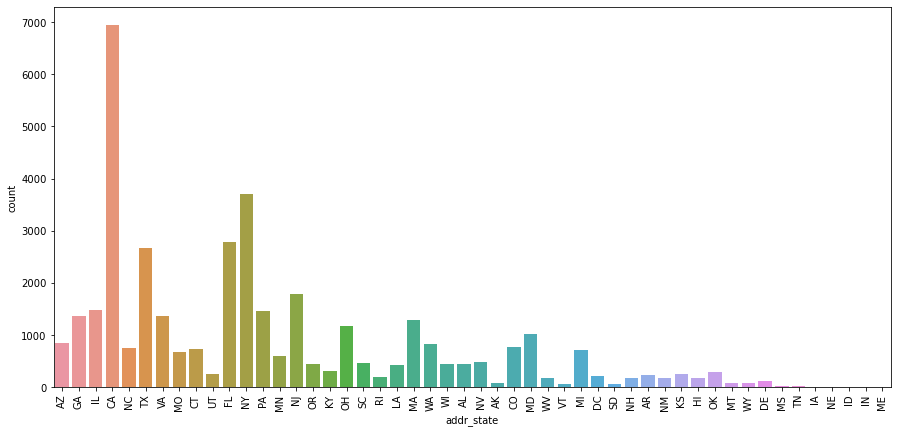

------------ delinq_2yrs ------------


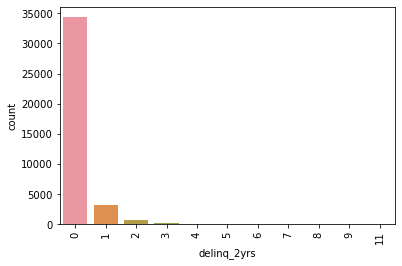

------------ emp_length ------------


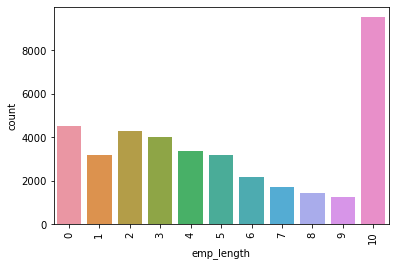

------------ grade ------------


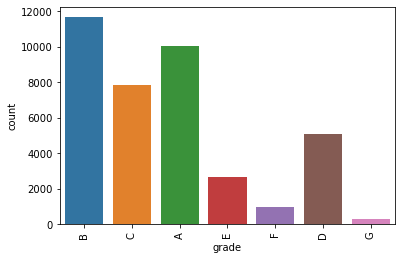

------------ home_ownership ------------


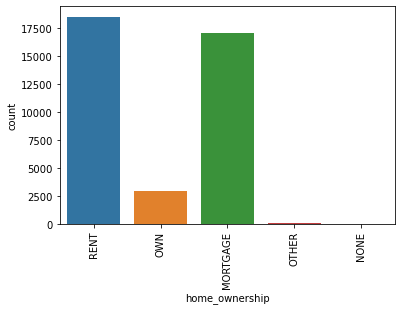

------------ loan_status ------------


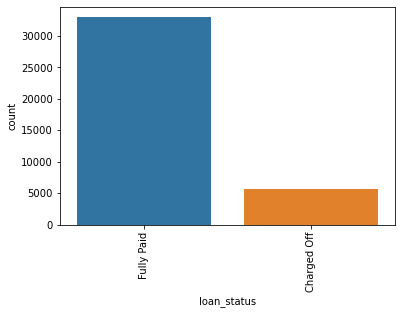

------------ pub_rec ------------


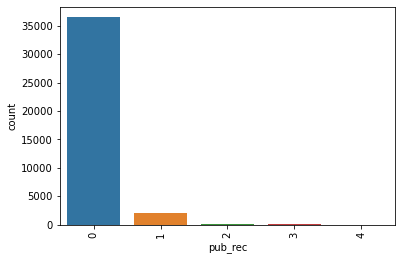

------------ pub_rec_bankruptcies ------------


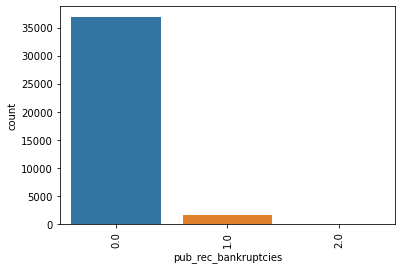

------------ purpose ------------


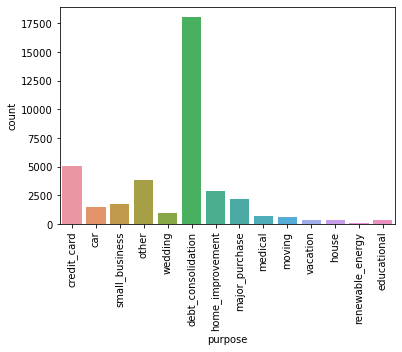

------------ sub_grade ------------


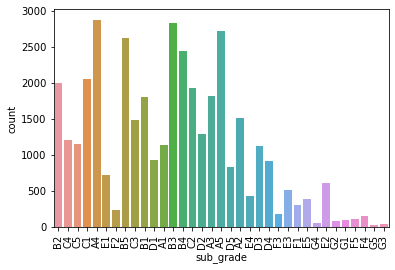

------------ term ------------


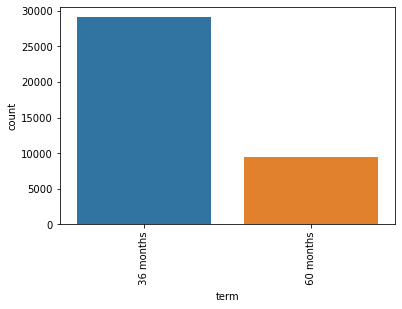

------------ verification_status ------------


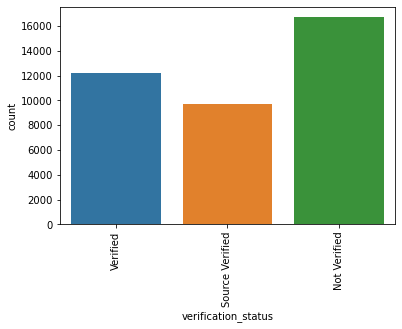

In [46]:
plt.figure(figsize=(15,7))
for i in categorical_cols:
    print("------------",i,"------------")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

<AxesSubplot:>

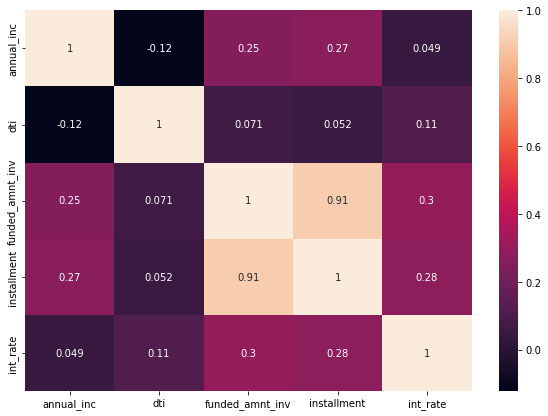

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(df[continous_cols].corr(), annot=True)

------------ annual_inc ------------


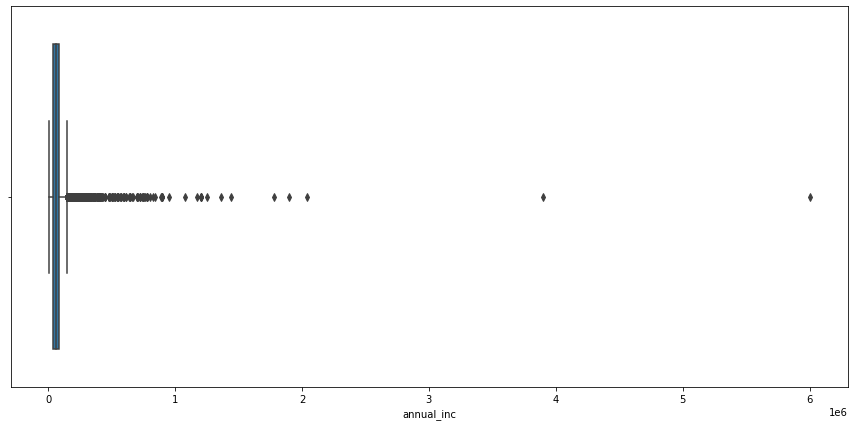

------------ dti ------------


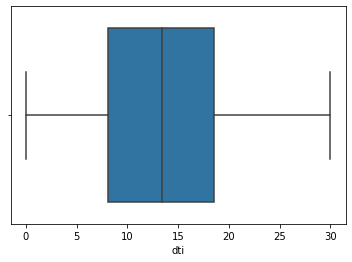

------------ funded_amnt_inv ------------


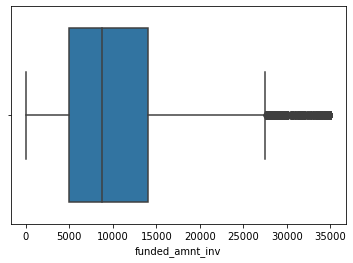

------------ installment ------------


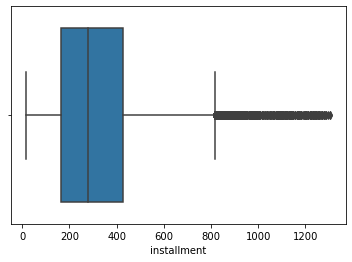

------------ int_rate ------------


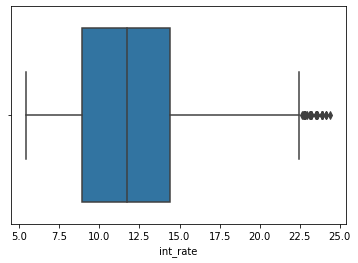

In [48]:
plt.figure(figsize=(15,7))
for i in continous_cols:
    print("------------",i,"------------")
    sns.boxplot(df[i])
    plt.show()

In [49]:
df["annual_inc"].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [50]:
#Calculating value for 98 percentile
p3 = np.percentile(df["annual_inc"],98)

<AxesSubplot:>

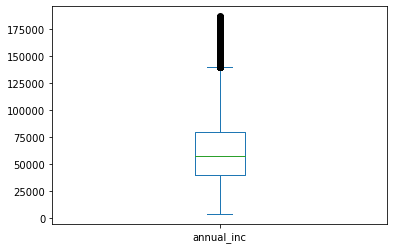

In [51]:
#Dry running the code to verify
df[df["annual_inc"]<p3].annual_inc.plot.box()

In [52]:
#Dropping outliers
df["annual_inc"] = df[df["annual_inc"]<p3]["annual_inc"]

------------ annual_inc ------------


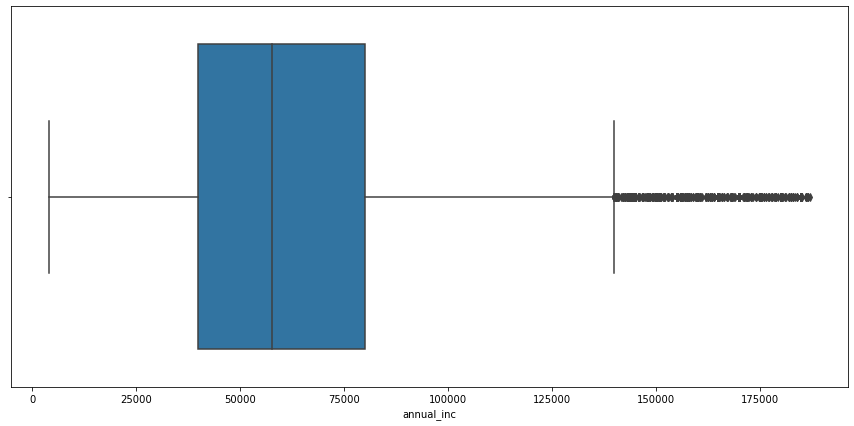

------------ dti ------------


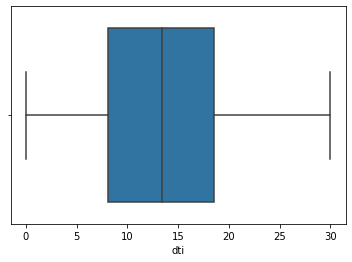

------------ funded_amnt_inv ------------


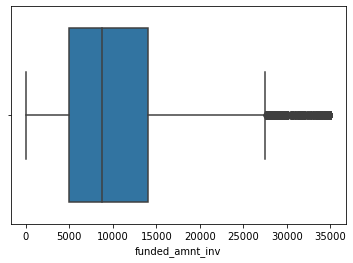

------------ installment ------------


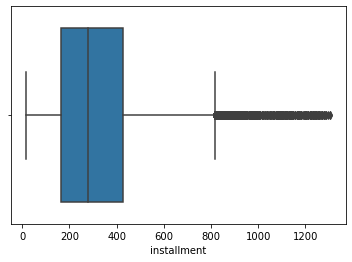

------------ int_rate ------------


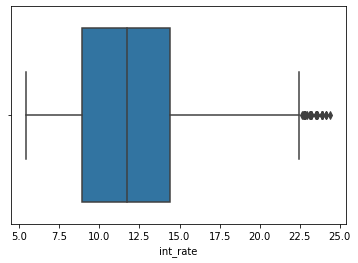

In [58]:
plt.figure(figsize=(15,7))
for i in continous_cols:
    print("------------",i,"------------")
    sns.boxplot(df[i])
    plt.show()

In [53]:
 # Dry running the code for plotting

<AxesSubplot:>

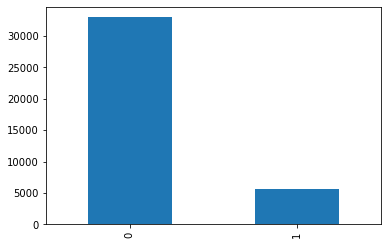

In [54]:
df["Target"].value_counts().plot(kind="bar")

<AxesSubplot:>

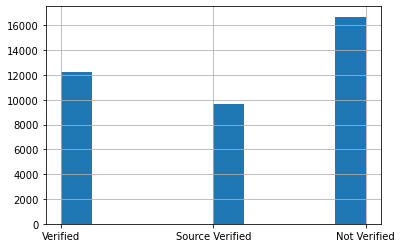

In [55]:
df["verification_status"].hist()

<AxesSubplot:>

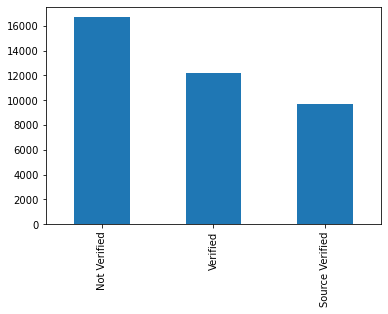

In [56]:
df["verification_status"].value_counts().plot(kind="bar")

In [57]:
df.groupby(["verification_status"]).Target.mean()

verification_status
Not Verified       0.128310
Source Verified    0.148186
Verified           0.168032
Name: Target, dtype: float64

<AxesSubplot:xlabel='verification_status'>

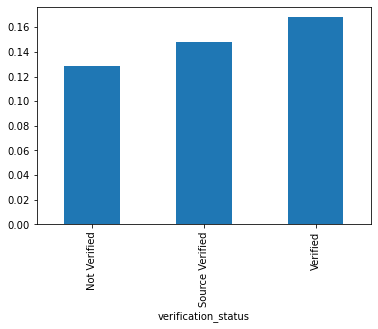

In [58]:
df.groupby("verification_status").Target.mean().plot(kind="bar")

In [59]:
df.groupby("verification_status").Target.value_counts().unstack()

Target,0,1
verification_status,,
Not Verified,14552,2142
Source Verified,8243,1434
Verified,10155,2051


<AxesSubplot:xlabel='verification_status'>

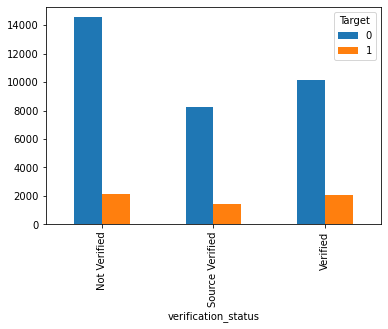

In [60]:
df.groupby("verification_status").Target.value_counts().unstack().plot.bar()

<AxesSubplot:xlabel='verification_status'>

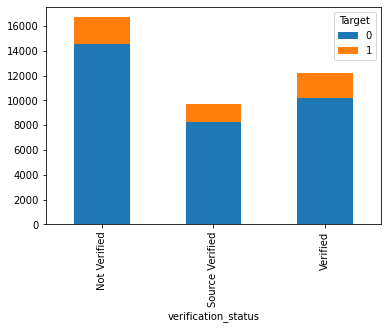

In [61]:
df.groupby("verification_status").Target.value_counts().unstack().plot.bar(stacked=True)

In [62]:
categorical_cols

['addr_state',
 'delinq_2yrs',
 'emp_length',
 'grade',
 'home_ownership',
 'loan_status',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'sub_grade',
 'term',
 'verification_status']

------------- addr_state -----------


<Figure size 1080x648 with 0 Axes>

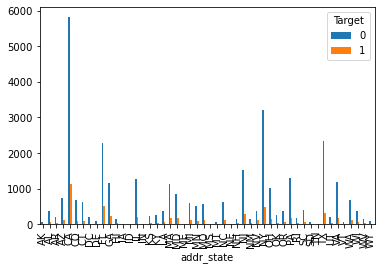

------------- delinq_2yrs -----------


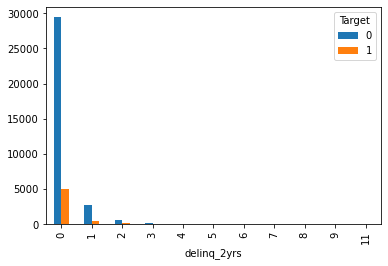

------------- emp_length -----------


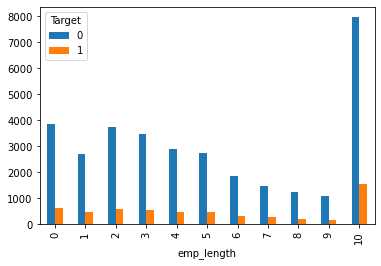

------------- grade -----------


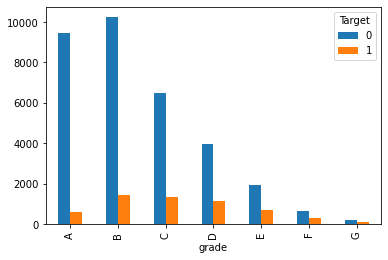

------------- home_ownership -----------


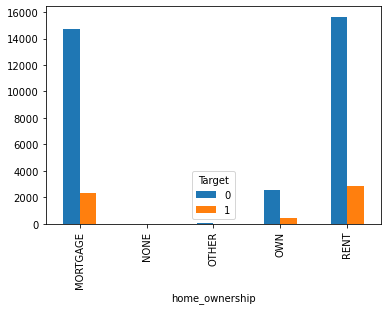

------------- loan_status -----------


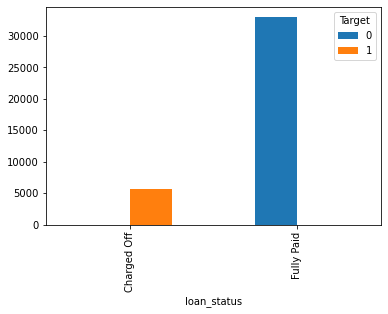

------------- pub_rec -----------


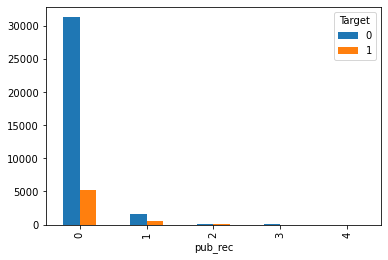

------------- pub_rec_bankruptcies -----------


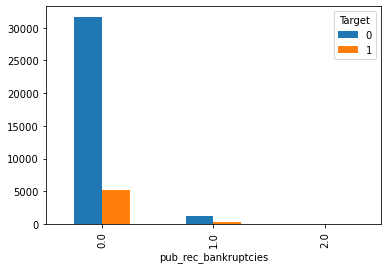

------------- purpose -----------


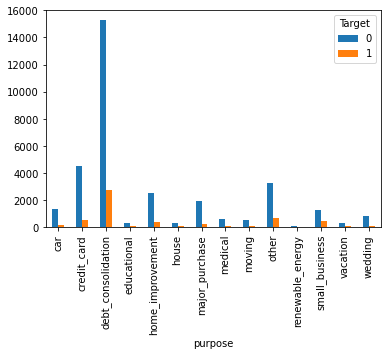

------------- sub_grade -----------


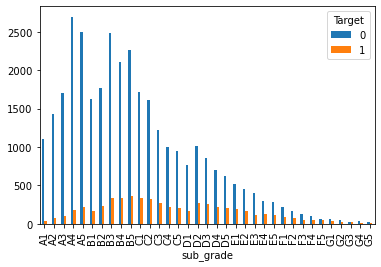

------------- term -----------


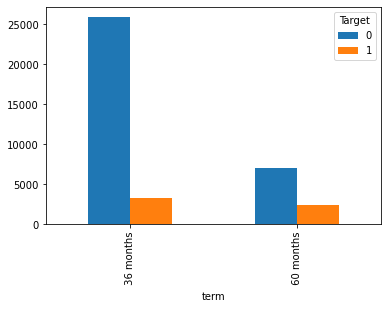

------------- verification_status -----------


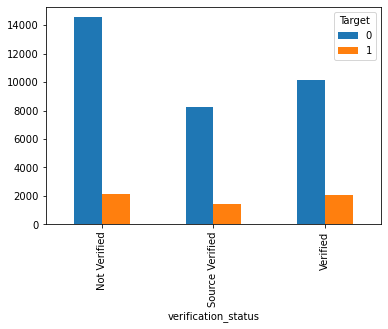

In [63]:
# Plotting for all the columns in categorical_cols list
plt.figure(figsize=(15,9))
for i in categorical_cols:
    print("-------------",i,"-----------")
    df.groupby(i).Target.value_counts().unstack().plot.bar()
    plt.show()

In [64]:
#Defining a function to get the differnce in default rate
def defrate(df,i):
    x1 = df["Target"].value_counts()[1]
    x = df.groupby(i).Target.value_counts().unstack()
    y = max(x[1]/x1)-min(x[1]/x1)
    print("---",i,"--->",y,"\n")



In [65]:
#Dry run
defrate(df,"verification_status")

--- verification_status ---> 0.12582192998045139 



In [69]:
#Applying "defrate" function on all the categorical columns
for i in categorical_cols:
    defrate(df,i)

--- addr_state ---> 0.199751199573485 

--- delinq_2yrs ---> 0.8770215034654345 

--- emp_length ---> 0.24897814110538474 

--- grade ---> 0.23529411764705885 

--- home_ownership ---> 0.5013328594277591 

--- loan_status ---> 0.0 

--- pub_rec ---> 0.9152301403945263 

--- pub_rec_bankruptcies ---> 0.9342456015638884 

--- purpose ---> 0.48835969433090454 

--- sub_grade ---> 0.061489248267282734 

--- term ---> 0.14696996623422787 

--- verification_status ---> 0.12582192998045139 

--- application_type ---> 0.0 

--- initial_list_status ---> 0.0 

--- policy_code ---> 0.0 

--- pymnt_plan ---> 0.0 

--- tax_liens ---> 0.0 



In [66]:
# List of categorical columns with high default rate
icat_cols=["purpose","pub_rec_bankruptcies","pub_rec","home_ownership","delinq_2yrs"]

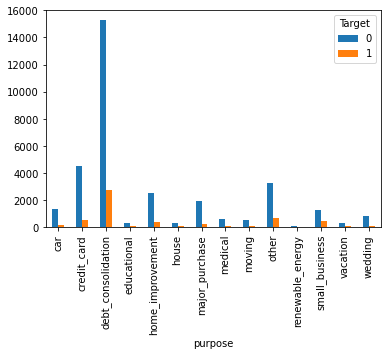

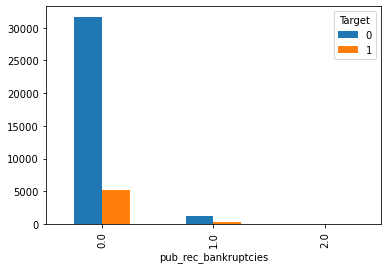

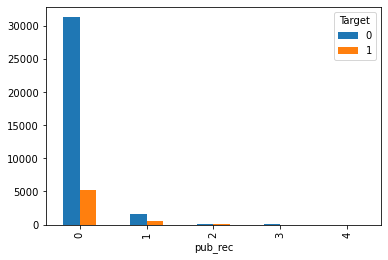

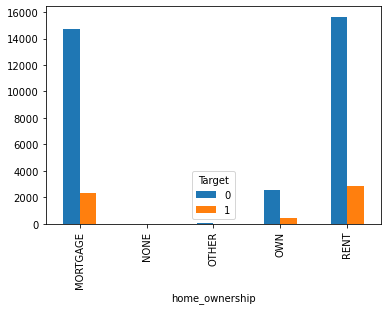

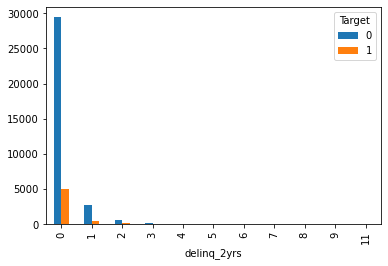

In [67]:
# Plotting for columns with high default rate
for i in icat_cols:
    df.groupby(i).Target.value_counts().unstack().plot.bar()

In [68]:
continous_cols

['annual_inc', 'dti', 'funded_amnt_inv', 'installment', 'int_rate']

In [69]:
df[continous_cols]

,annual_inc,dti,funded_amnt_inv,installment,int_rate
0,24000.0,27.65,4975.0,162.87,10.65
1,30000.0,1.00,2500.0,59.83,15.27
2,12252.0,8.72,2400.0,84.33,15.96
3,49200.0,20.00,10000.0,339.31,13.49
5,36000.0,11.20,5000.0,156.46,7.90
...,...,...,...,...,...
39712,110000.0,11.33,1075.0,78.42,8.07
39713,18000.0,6.40,875.0,275.38,10.28
39714,100000.0,2.30,1325.0,156.84,8.07
39715,NaN,3.72,650.0,155.38,7.43


In [70]:
nulls(continous_cols)

['annual_inc']

In [71]:
df["annual_inc"].isnull().sum()

774

In [72]:
df["annual_inc"].value_counts()


60000.00     1466
50000.00     1029
40000.00      855
45000.00      811
30000.00      808
             ... 
64052.00        1
52769.60        1
120120.00       1
58852.56        1
27376.00        1
Name: annual_inc, Length: 4989, dtype: int64

In [73]:
# Replacing missing values with mode of the column(i,e 60000.00)
df["annual_inc"].fillna(value=60000.00,inplace=True)


In [74]:
df["annual_inc"].dtypes

dtype('float64')

In [75]:
df["annual_inc"].value_counts()

60000.00     2240
50000.00     1029
40000.00      855
45000.00      811
30000.00      808
             ... 
64052.00        1
52769.60        1
120120.00       1
58852.56        1
27376.00        1
Name: annual_inc, Length: 4989, dtype: int64

In [76]:
nulls(continous_cols)

[]

In [77]:
defrate(df,"issue_month")

--- issue_month ---> 0.06895326106273325 



In [78]:
defrate(df,"issue_year")

--- issue_year ---> 0.570641549671228 



<AxesSubplot:xlabel='issue_month'>

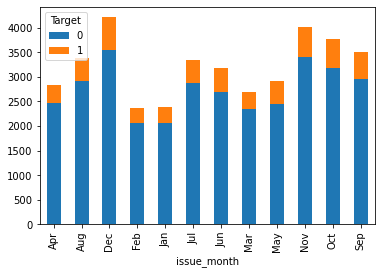

In [79]:
df.groupby("issue_month").Target.value_counts().unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='issue_month'>

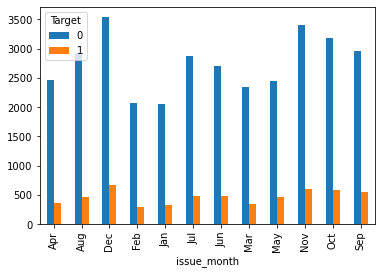

In [80]:
df.groupby("issue_month").Target.value_counts().unstack().plot.bar()

<AxesSubplot:xlabel='issue_year'>

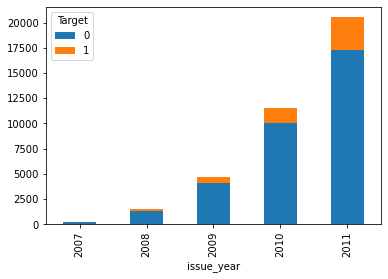

In [81]:
df.groupby("issue_year").Target.value_counts().unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='issue_year'>

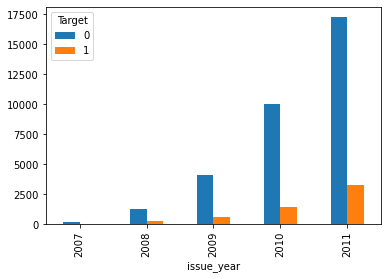

In [82]:
df.groupby("issue_year").Target.value_counts().unstack().plot.bar()

In [83]:
df[continous_cols].describe()

,annual_inc,dti,funded_amnt_inv,installment,int_rate
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,63792.186696,13.272727,10222.481123,322.466318,11.932219
std,31951.225393,6.673044,7022.720644,208.639215,3.691327
min,4000.000000,0.000000,0.000000,15.690000,5.420000
25%,40000.000000,8.130000,5000.000000,165.740000,8.940000
50%,58868.000000,13.370000,8733.440000,277.860000,11.710000
75%,80000.000000,18.560000,14000.000000,425.550000,14.380000
max,186996.000000,29.990000,35000.000000,1305.190000,24.400000


In [84]:
# Converting continous columns into categorical columns by dividing them into 5 bins
# Keeping all the labels same

In [85]:
df["bin_int_rate"] = pd.cut(df["int_rate"],5,labels=["Very Low","Low","Medium","High","Very High"])

In [86]:
df["bin_annual_inc"] = pd.cut(df["annual_inc"],5,labels=["Very Low","Low","Medium","High","Very High"])

In [87]:
df["bin_dti"] = pd.cut(df["dti"],5,labels=["Very Low","Low","Medium","High","Very High"])

In [88]:
df["bin_funded"] = pd.cut(df["funded_amnt_inv"],5,labels=["Very Low","Low","Medium","High","Very High"])

In [89]:
df["bin_installment"] = pd.cut(df["installment"],5,labels=["Very Low","Low","Medium","High","Very High"])

In [90]:
bin_cols = ["bin_int_rate","bin_annual_inc","bin_dti","bin_funded","bin_installment"]

--------- bin_int_rate --------


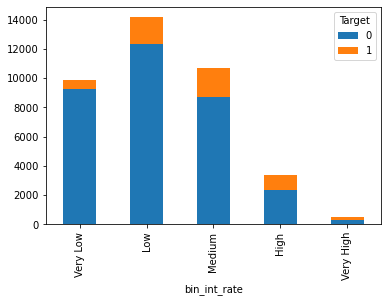

--------- bin_annual_inc --------


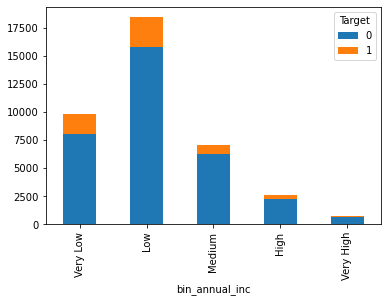

--------- bin_dti --------


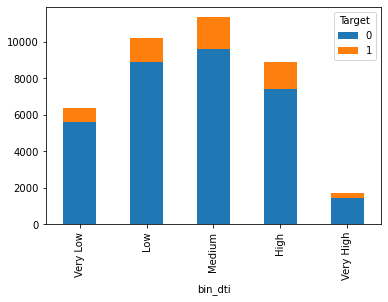

--------- bin_funded --------


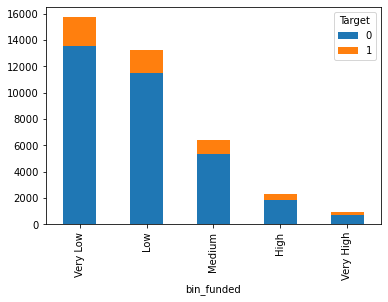

--------- bin_installment --------


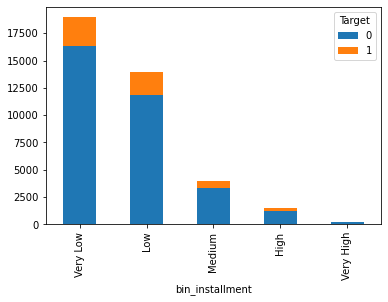

In [91]:
#Plotting for all binned columns
for i in bin_cols:
    print("---------",i,"--------")
    df.groupby(i).Target.value_counts().unstack().plot.bar(stacked=True)
    plt.show()

--------- bin_int_rate --------


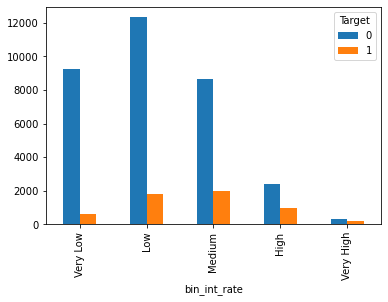

--------- bin_annual_inc --------


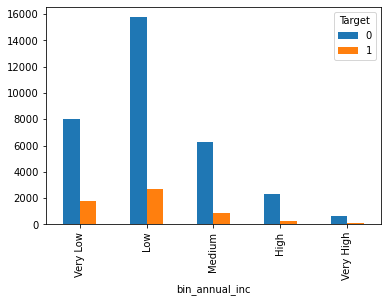

--------- bin_dti --------


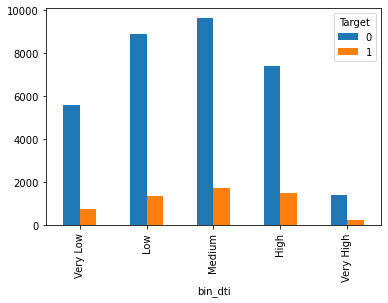

--------- bin_funded --------


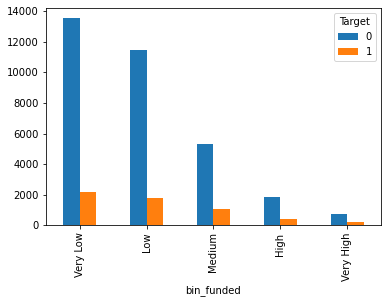

--------- bin_installment --------


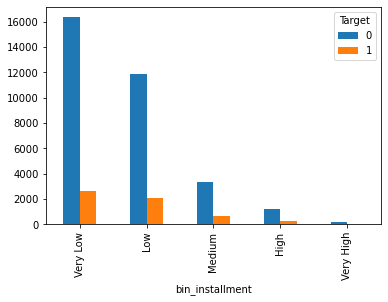

In [92]:
for i in bin_cols:
    print("---------",i,"--------")
    df.groupby(i).Target.value_counts().unstack().plot.bar()
    plt.show()

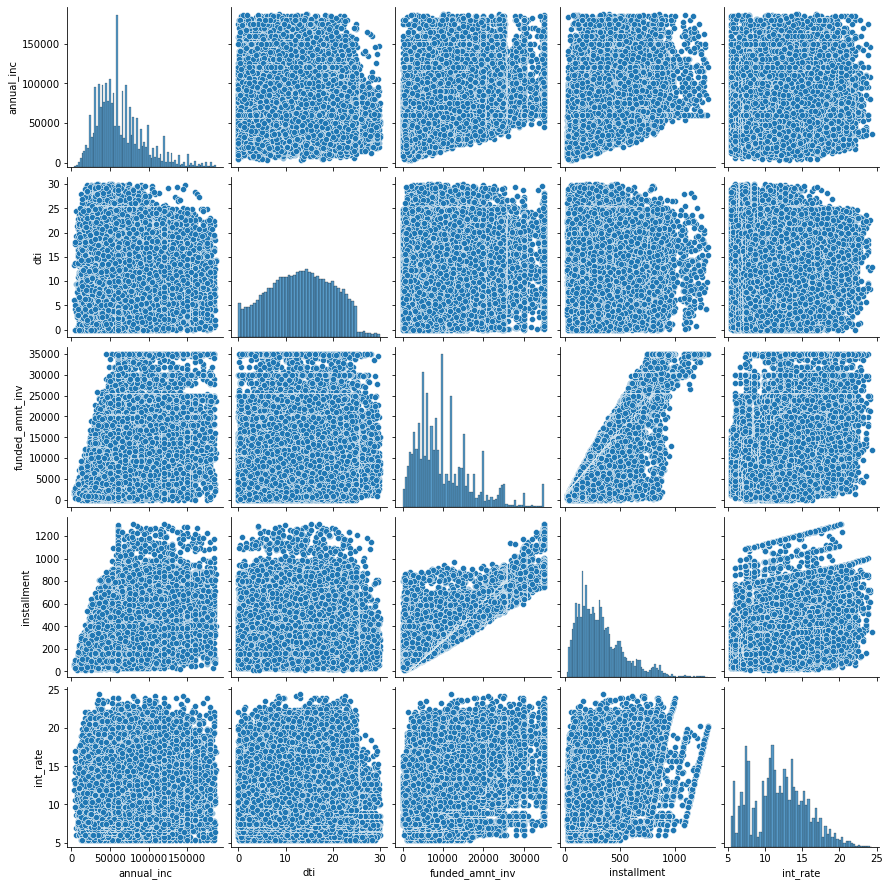

In [93]:
sns.pairplot(df[continous_cols])

<AxesSubplot:xlabel='emp_length', ylabel='funded_amnt_inv'>

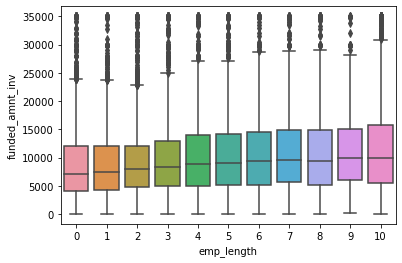

In [94]:
sns.boxplot(data=df,x="emp_length",y="funded_amnt_inv")

<AxesSubplot:xlabel='term', ylabel='funded_amnt_inv'>

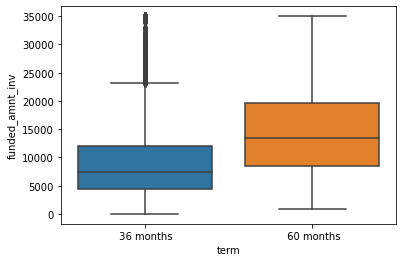

In [95]:
sns.boxplot(data=df,x="term",y="funded_amnt_inv")

<AxesSubplot:xlabel='grade', ylabel='funded_amnt_inv'>

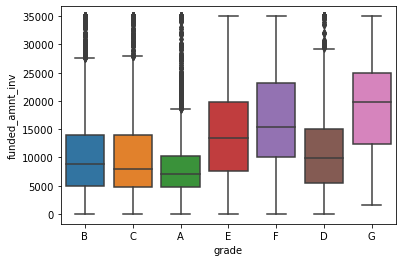

In [96]:
sns.boxplot(data=df,x="grade",y="funded_amnt_inv")

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt_inv'>

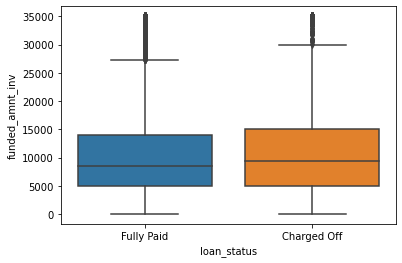

In [97]:
sns.boxplot(data=df,x="loan_status",y="funded_amnt_inv")